## Make a Wright-Fisher graph

The rate of change of allele frequency depends on the selection coefficient.

IBD-based methods exploit recent changes in allele frequency and demography.

This simple notebook plots such. It helps build intuition.

In [7]:
from isweep import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',size=14)

In [2]:
# graphing
colors = ['tab:blue',"tab:orange","tab:green","tab:red","tab:purple","tab:brown"]
xupp = 100 # upper bound for generations
alpha=0.1

In [3]:
K = 50 # number of simulations
Ne = read_Ne('constant-10k.ne') # population size

In [5]:
ss = [0.,0.01,0.02,0.03,0.04,0.05] # strong selection

# ss = [0.,0.001,0.002,0.003,0.004,0.005] # weak selection

# ss = [0.1,0.2,0.3,0.4] # very strong selection

ss.reverse()

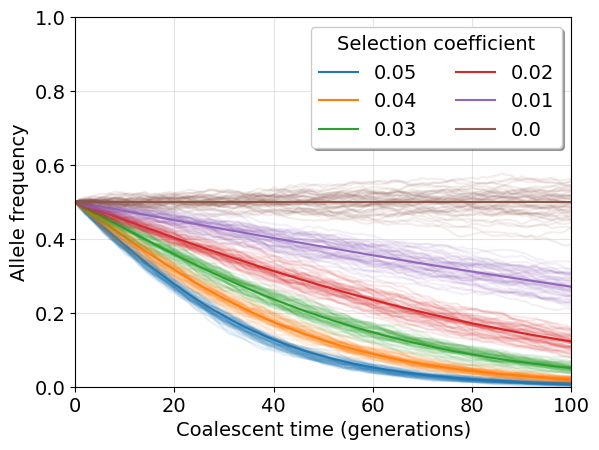

In [6]:
# choose allele frequency
p = 0.5

loc = 'lower center'

xy = walk_variant_backward(0.,0.5,Ne)
y = xy[0]
x = range(len(y))

plt.plot(x,y,color='white')

for i in range(len(ss)):
    s = ss[i]
    color = colors[i]
    for k in range(K):
        xy = walk_variant_backward(s,p,Ne,random_walk=True)
        y = xy[0]
        x = range(len(y))
        plt.plot(x,y,color=color,alpha=alpha)
    xy = walk_variant_backward(s,p,Ne,random_walk=False)
    y = xy[0]
    x = range(len(y))
    plt.plot(x,y,color=color,label=s)

plt.xlim(0,xupp)
plt.ylim(0,1)
plt.ylabel('Allele frequency')
plt.xlabel('Coalescent time (generations)')
plt.legend(
           title='Selection coefficient',
           ncol=2,
           fontsize=14,
    frameon=True,
    shadow=True,
          )
plt.grid(alpha=0.33)